In [39]:
from pathlib import Path
import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm import tqdm
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import  ttest_ind
from collections import Counter

In [40]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid")
import matplotlib.collections as clt
import ptitprince as pt

In [3]:
viapath = Path('/mrhome/vladyslavz/git/central-sulcus-analysis/data/via11/nobackup/segm_results/skull_stripped_images')
bvisapath = Path('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup')

In [4]:
dirs_bvisa = [x for x in bvisapath.iterdir()]
print(dirs_bvisa)

dirs_via = [x for x in viapath.iterdir()]
print(dirs_via)



[PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_noSynthAugm_monaiUnet'), PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_SynthAugm_monaiUnet'), PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining'), PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune'), PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/via11-monai-BasicUnet-bvisaSim-skullstripped-noMaxPool'), PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool'), PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder'), PosixP

In [5]:
aggregate_results = []
for exp in dirs_via:
    res_csv = pd.read_csv(exp / 'via11_metrics.csv').set_index('caseid')
    aggr = {'exp': exp.name,
            'dataset':'via',
            'dice':f'{res_csv.loc["MEAN", "dice"]:0.4f}+-{res_csv.loc["STD", "dice"]:0.4f}',
            'hausdorff':f'{res_csv.loc["MEAN", "hausdorff_distance"]:0.4f}+-{res_csv.loc["STD", "hausdorff_distance"]:0.4f}',
            'table':res_csv}
    aggregate_results.append(aggr)
    
for exp in dirs_bvisa:
    try:
        res_csv = pd.read_csv(exp / 'bvisa_metrics.csv').set_index('caseid')
    except:
        print(exp)
        continue
    aggr = {'exp': exp.name,
            'dataset':'bvisa',
            'dice':f'{res_csv.loc["MEAN", "dice"]:0.4f}+-{res_csv.loc["STD", "dice"]:0.4f}',
            'hausdorff':f'{res_csv.loc["MEAN", "hausdorff_distance"]:0.4f}+-{res_csv.loc["STD", "hausdorff_distance"]:0.4f}',
            'table':res_csv
            }
    aggregate_results.append(aggr)


aggregate_results = pd.DataFrame(aggregate_results)
aggregate_results

/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/via11-monai-BasicUnet-bvisaSim-skullstripped-noMaxPool


,exp,dataset,dice,hausdorff,table
0,CS1x_noSST_noSynthAugm_monaiUnet,via,0.6752+-0.0267,40.8424+-30.7903,dice iou hausdorff_dist...
1,CS1x_noSST_SynthAugm_monaiUnet,via,0.6429+-0.0215,10.4648+-11.4431,dice iou hausdorff_dist...
2,CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining,via,0.6354+-0.0228,15.7147+-16.3725,dice iou hausdorff_dist...
3,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFi...,via,0.6399+-0.0296,28.7512+-32.2332,dice iou hausdorff_dist...
4,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.6462+-0.0214,17.4486+-22.9309,dice iou hausdorff_dist...
5,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozen...,via,0.5961+-0.0390,50.2468+-26.3071,dice iou hausdorff_dist...
6,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.5565+-0.0345,35.9109+-26.1089,dice iou hausdorff_dist...
7,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.6424+-0.0230,36.2664+-32.4124,dice iou hausdorff_dist...
8,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.5449+-0.0384,30.6645+-16.6440,dice iou hausdorff_dist...
9,CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEnc...,via,0.5992+-0.0324,25.4629+-13.2096,dice iou hausdorff_dist...


In [6]:
merged_dfs = []
for exp in aggregate_results.index:
    df = aggregate_results.loc[exp, 'table'].iloc[:-2, :].copy()
    df.loc[:, 'Experiment'] = aggregate_results.loc[exp, 'exp']
    df.loc[:, 'Dataset'] = aggregate_results.loc[exp, 'dataset']
    merged_dfs.append(df)
merged_dfs = pd.concat(merged_dfs)
merged_dfs = merged_dfs.rename(columns={'dice':'Dice', 'hausdorff_distance':'Hausdorff distance'})

In [7]:
sns.set_palette('muted')

# Plots 1: NoSST-BVISA

In [25]:
plt.rcParams['font.size']  = 25
sns.set_context("notebook", font_scale=1.5)


/tmp/ipykernel_2358937/1604022400.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, texts = legend.legendHandles, legend.get_texts()


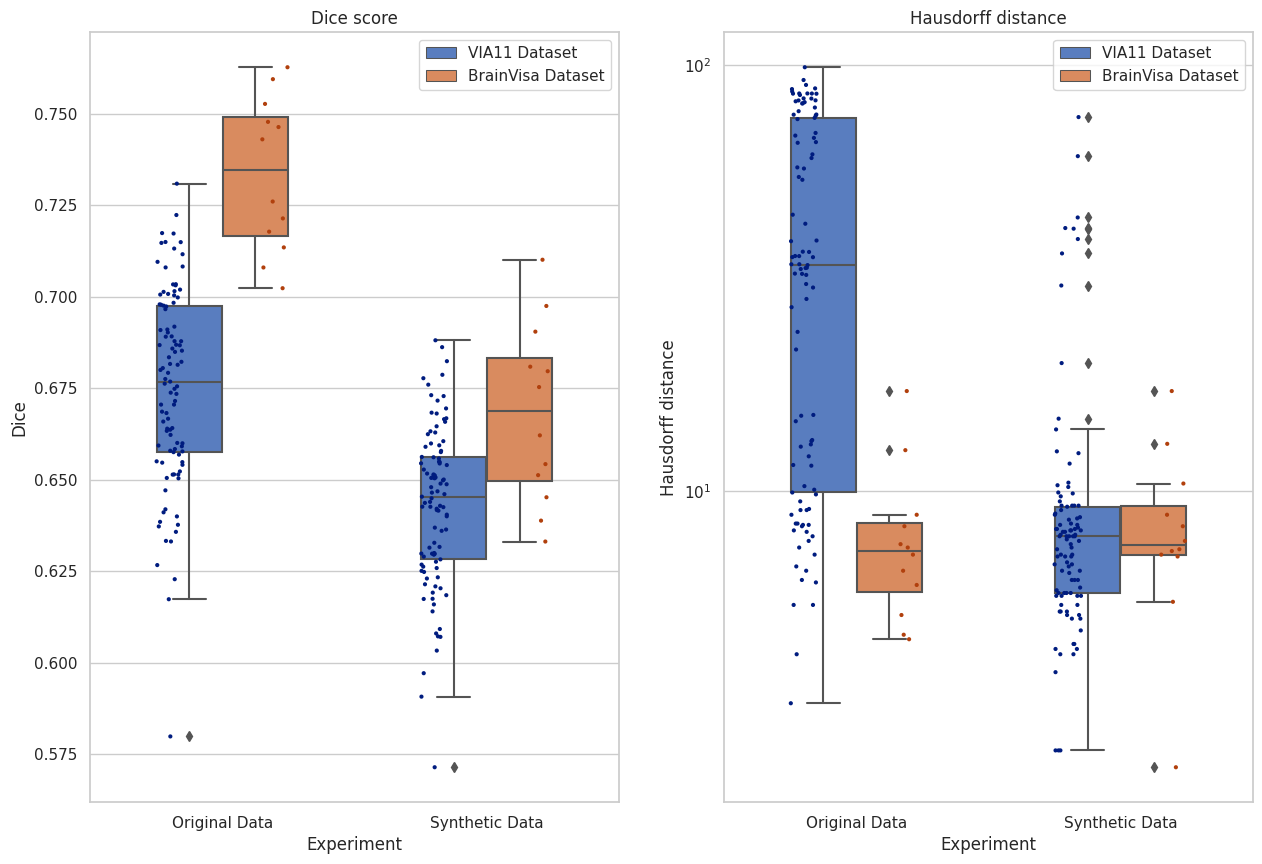

In [38]:
filter_ds = None #'via'
experiments2select = ['CS1x_noSST_noSynthAugm_monaiUnet',
                      'CS1x_noSST_SynthAugm_monaiUnet']
experiments2rename = {'CS1x_noSST_noSynthAugm_monaiUnet':'Original Data',
                      'CS1x_noSST_SynthAugm_monaiUnet':'Synthetic Data'}
if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.5, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])

plt.xticks(rotation=0)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)



ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

In [42]:
ttest_ind(plot_df[(plot_df.Experiment == 'Synthetic Data')&(plot_df.Dataset == 'via')]['Dice'].values,
          plot_df[(plot_df.Experiment == 'Original Data')&(plot_df.Dataset == 'via')]['Dice'].values,
          equal_var=False, permutations=10000)

Ttest_indResult(statistic=-9.42719494046462, pvalue=9.999000099990002e-05)

/tmp/ipykernel_3080444/2008289561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_3080444/2008289561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_3080444/2008289561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'Exp

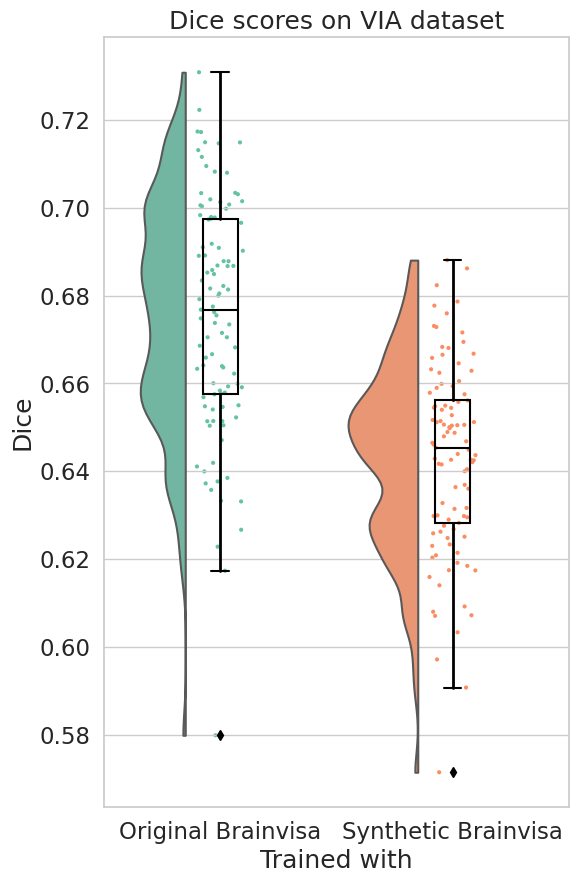

/tmp/ipykernel_3080444/2008289561.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_3080444/2008289561.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_3080444/2008289561.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'

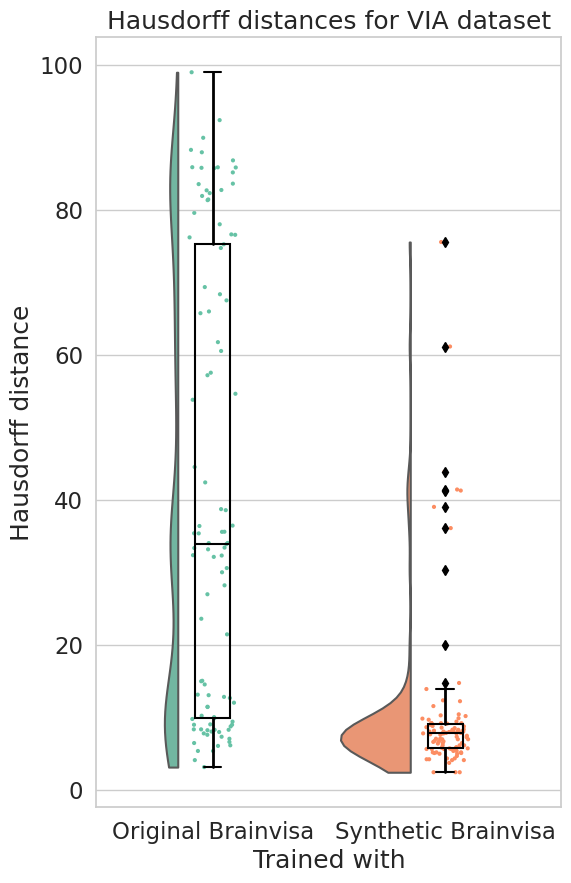

In [42]:
plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Dice"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)

plt.title("Dice scores on VIA dataset")
plt.show()

plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Hausdorff distance"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)

plt.title("Hausdorff distances for VIA dataset")
plt.show()

/tmp/ipykernel_3080444/1513040913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_3080444/1513040913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_3080444/1513040913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'Exp

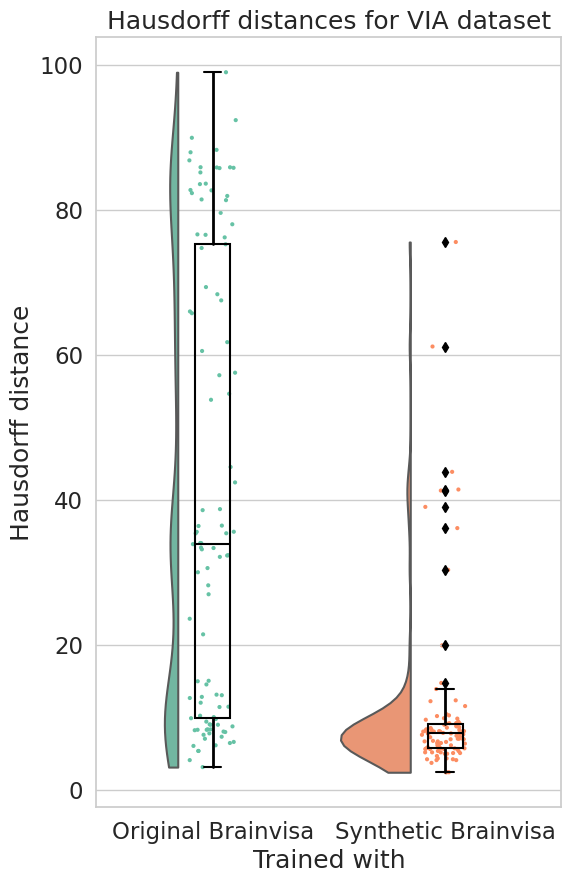

In [43]:
plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Hausdorff distance"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)

plt.title("Hausdorff distances for VIA dataset")
plt.show()

Conclusions: Synthetic Data Generation Works pretty well

# Plots2: SimpleSST VIA-BVISA Results Full fine tune

/tmp/ipykernel_2358937/268540614.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, texts = legend.legendHandles, legend.get_texts()


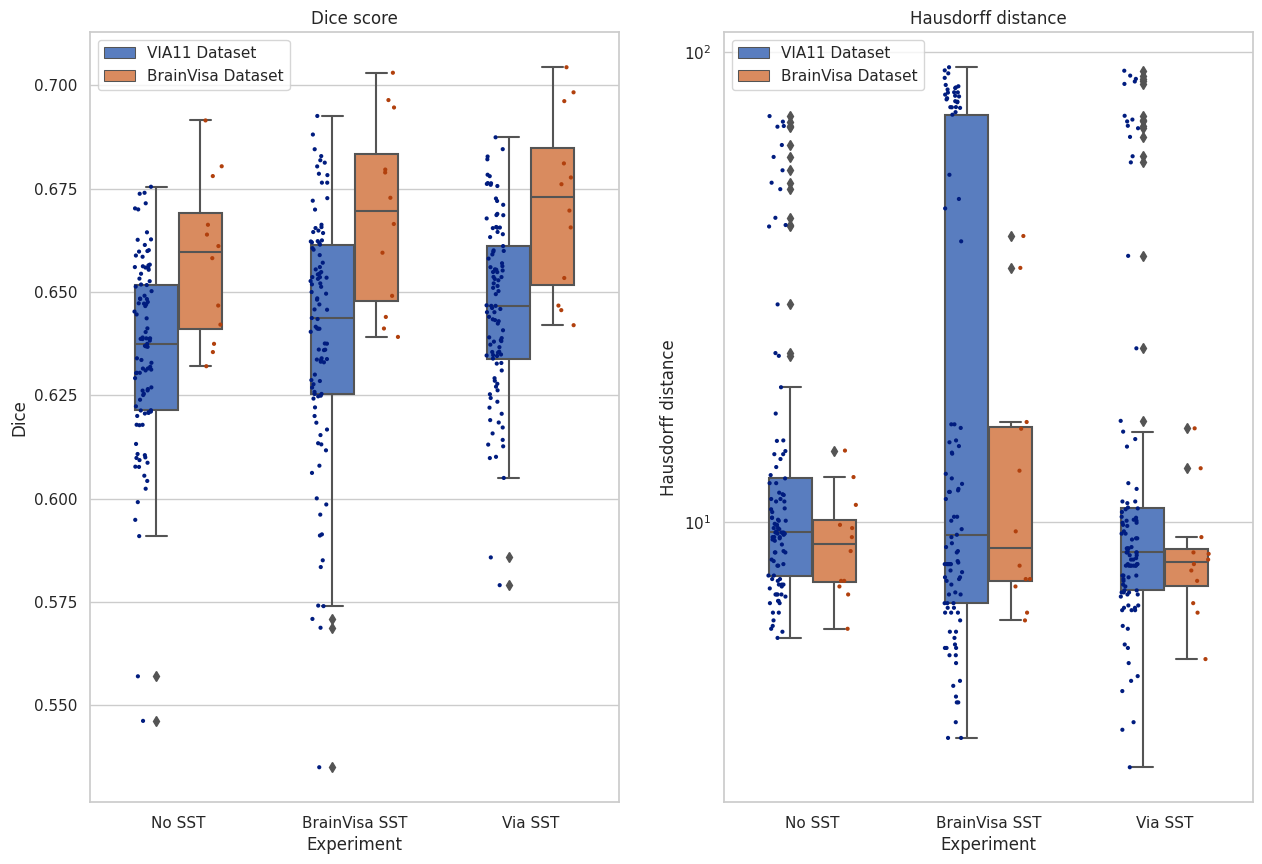

In [22]:
filter_ds = None #'via'
experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
                     ]
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining':'No SST',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune':'BrainVisa SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool':'Via SST',
                     }

if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df



fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.5, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])

plt.xticks(rotation=0)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)



ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

Ttest_indResult(statistic=-1.213191087222644, pvalue=0.2293770622937706)

In [31]:
plot_df

,Dice,iou,Hausdorff distance,Experiment,Dataset
caseid,,,,,
sub-via052,0.638595,0.469071,9.486833,No SST,via
sub-via085,0.651668,0.483314,8.306624,No SST,via
sub-via118,0.648291,0.479608,9.848858,No SST,via
sub-via126,0.653225,0.485029,11.045361,No SST,via
sub-via151,0.658522,0.490893,14.866069,No SST,via
...,...,...,...,...,...
shiva,0.645594,0.476662,13.000000,Via SST,bvisa
sujet04,0.677712,0.512529,8.544004,Via SST,bvisa
sujet05,0.641954,0.472705,8.124038,Via SST,bvisa


In [12]:
aggregate_results[aggregate_results.exp.isin(experiments2select)]

,exp,dataset,dice,hausdorff,table
2,CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining,via,0.6354+-0.0228,15.7147+-16.3725,dice iou hausdorff_dist...
3,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFi...,via,0.6399+-0.0296,28.7512+-32.2332,dice iou hausdorff_dist...
4,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.6462+-0.0214,17.4486+-22.9309,dice iou hausdorff_dist...
17,CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining,bvisa,0.6578+-0.0185,9.1776+-2.3141,dice iou hausdorff_distan...
18,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFi...,bvisa,0.6687+-0.0216,14.4016+-10.9854,dice iou hausdorff_distan...
19,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,bvisa,0.6714+-0.0206,8.7691+-2.8022,dice iou hausdorff_distan...


In [13]:
merged_dfs

,Dice,iou,Hausdorff distance,Experiment,Dataset
caseid,,,,,
sub-via052,0.668216,0.501745,53.823787,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via085,0.689161,0.525740,81.939002,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via118,0.703360,0.542448,8.306624,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via126,0.697913,0.535995,38.742741,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via151,0.708252,0.548290,7.071068,CS1x_noSST_noSynthAugm_monaiUnet,via
...,...,...,...,...,...
shiva,0.491803,0.326087,7.681146,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa
sujet04,0.483871,0.319149,8.774964,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa
sujet05,0.446927,0.287770,8.485281,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa


# Plots 3: SimpleSST VIA-BVISA Results Frozen Encoder

/tmp/ipykernel_3080444/3183995447.py:38: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, texts = legend.legendHandles, legend.get_texts()


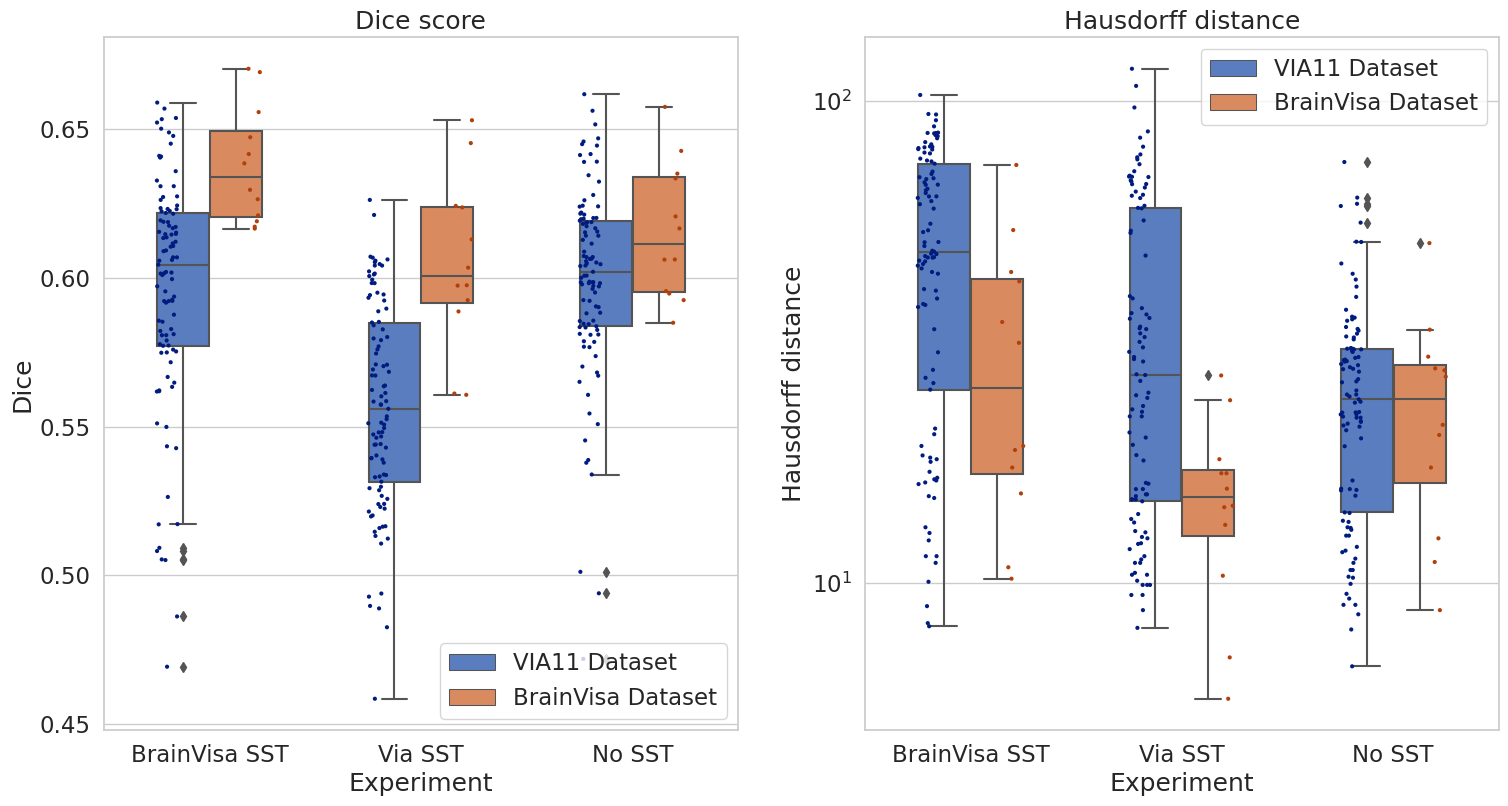

In [59]:
filter_ds = None #'via'
experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool']
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder':'No SST',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder':'BrainVisa SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool':'Via SST'}
if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig, ax = plt.subplots(1, 2, figsize=(18, 9))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.5, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])
# ax[0].set_xticklabels(['No SST', 'Brainvisa SST', 'VIA SST'], rotation=0)
# ax[1].set_xticklabels(['No SST', 'Brainvisa SST', 'VIA SST'], rotation=0)
plt.xticks(rotation=0)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)



ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

/tmp/ipykernel_3080444/3671075986.py:56: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, texts = legend.legendHandles, legend.get_texts()


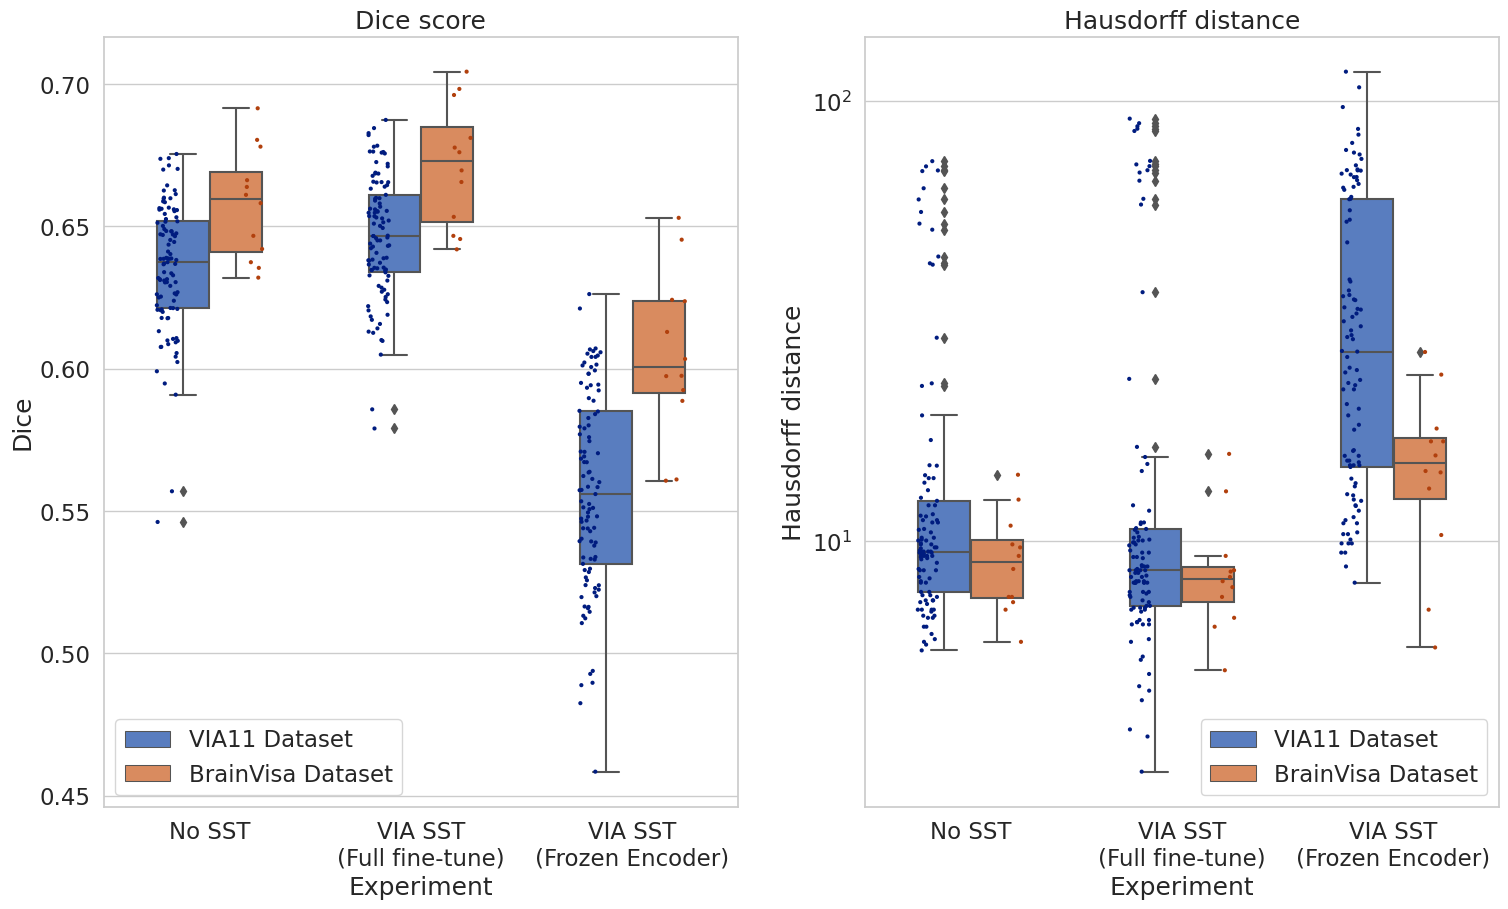

In [52]:
filter_ds = None #'via'
# experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder',
#                       'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder',
#                       'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool']
# experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder':'No SST',
#                       'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder':'BrainVisa SST',
#                       'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool':'Via SST MaxPool'}

experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining',
                    #   'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool',
                    #   'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder',

]

                     
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining':'No SST',
                    #   'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune':'BrainVisa Full fine-tune SST',
                    #   'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder':'BrainVisa Frozen Encoder SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool':'VIA SST\n(Full fine-tune)',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool':'VIA SST\n(Frozen Encoder)',
                     }


if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.5, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])

plt.xticks(rotation=0)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)



ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

/tmp/ipykernel_2157082/3280803070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'Exp

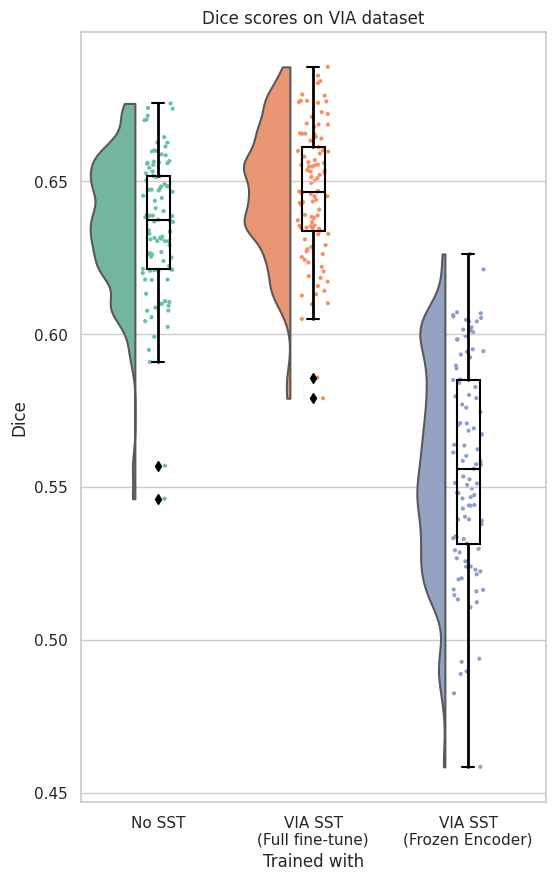

/tmp/ipykernel_2157082/3280803070.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'

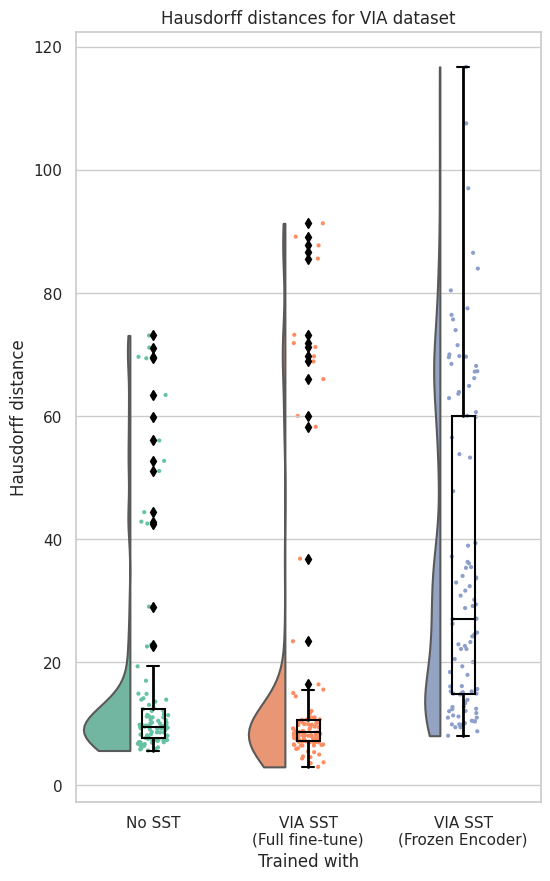

In [29]:
plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Dice"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
# plt.xticks(rotation=30)
plt.title("Dice scores on VIA dataset")
plt.show()

plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Hausdorff distance"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
# plt.xticks (rotation=30)
plt.title("Hausdorff distances for VIA dataset")
plt.show()

# Plots 4: Segment-SST

/tmp/ipykernel_2358937/4076223731.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, texts = legend.legendHandles, legend.get_texts()


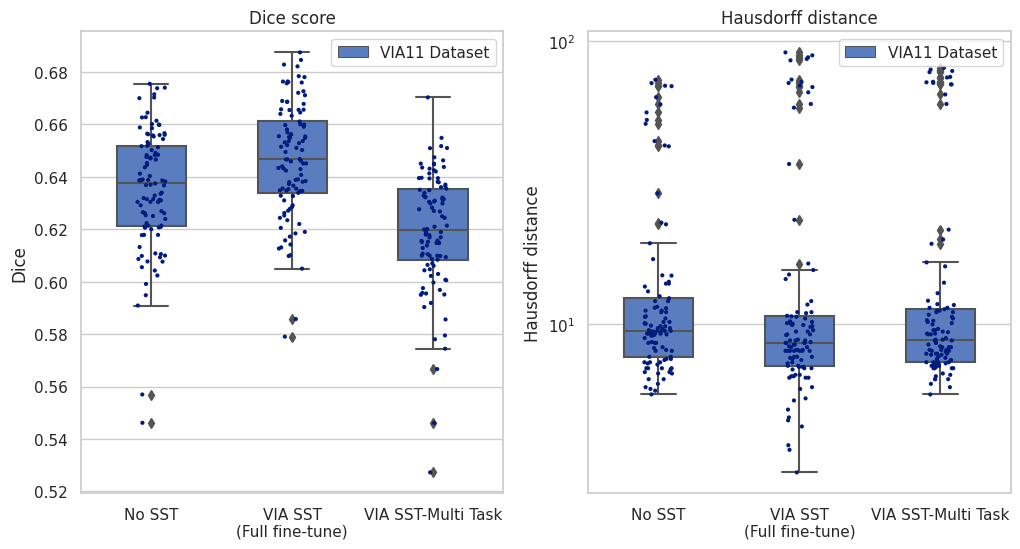

In [17]:

experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining',
                    #   'CS2x_via11SegmSST_monaiUnet-frozenEncoder',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
                      'CS1x_via11SegmSST_monaiUnet-fullFinetune',
                    #   'CS2x_via11SegmSST_monaiUnet-frozenEncoder'
                      ]  
                     
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining':'No SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool':'VIA SST\n(Full fine-tune)',
                      'CS1x_via11SegmSST_monaiUnet-fullFinetune': 'VIA SST-Multi Task'
                       }


filter_ds = 'via' #'via'


if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.5, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:1], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:1], ['VIA11 Dataset', 'BrainVisa Dataset'])

plt.xticks(rotation=0)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)


ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

ValueError: min() arg is an empty sequence

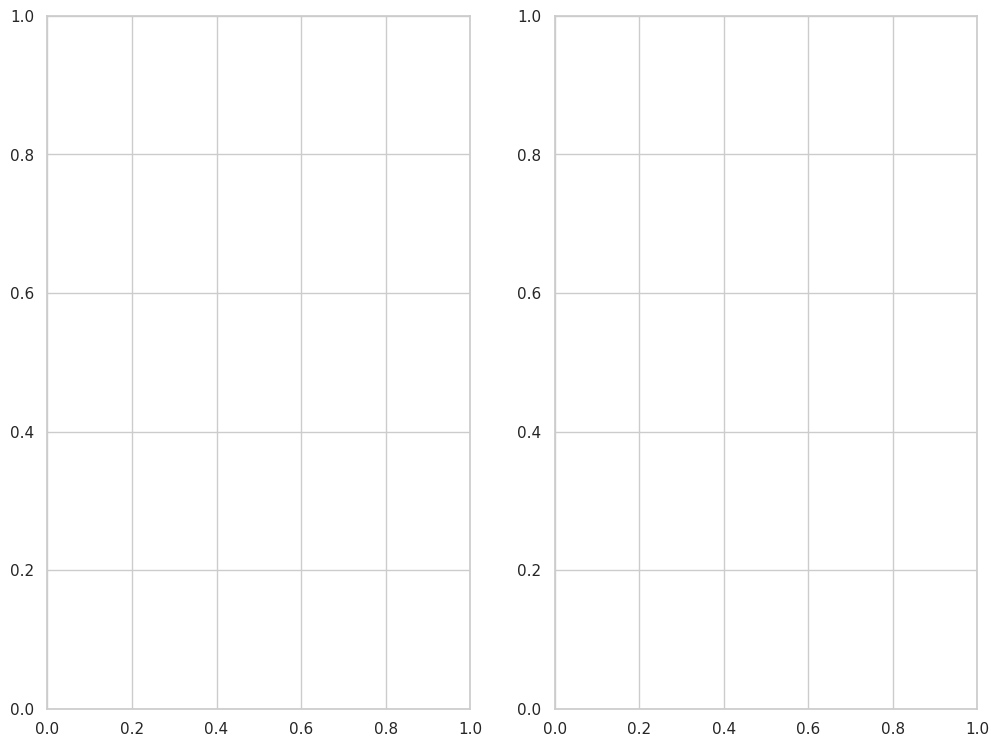

In [20]:

experiments2select = ['CS2x_via11SegmSST_monaiUnet-fullFinetune',
                    #   'CS2x_via11SegmSST_monaiUnet-frozenEncoder',
                      'CS2x_noSST_monaiUnet-fullFinetune',
                      'CS2x_bvisaSST_monaiUnet-fullFinetune',
                    #   'CS2x_via11SegmSST_monaiUnet-frozenEncoder'
                      ]  
                     
experiments2rename = {'CS2x_via11SegmSST_monaiUnet-fullFinetune': 'VIA SST-Segmentation',
                      'CS2x_noSST_monaiUnet-fullFinetune': 'No SST',
                      'CS2x_bvisaSST_monaiUnet-fullFinetune':'VIA SST',
                      #  'CS2x_via11SegmSST_monaiUnet-frozenEncoder':'VIA SST\n(Frozen Encoder)',
                       }




if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig, ax = plt.subplots(1, 2, figsize=(12, 9))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.3, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.3, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:1], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:1], ['VIA11 Dataset', 'BrainVisa Dataset'])

plt.xticks(rotation=0)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)



ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

/tmp/ipykernel_2157082/3280803070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'Exp

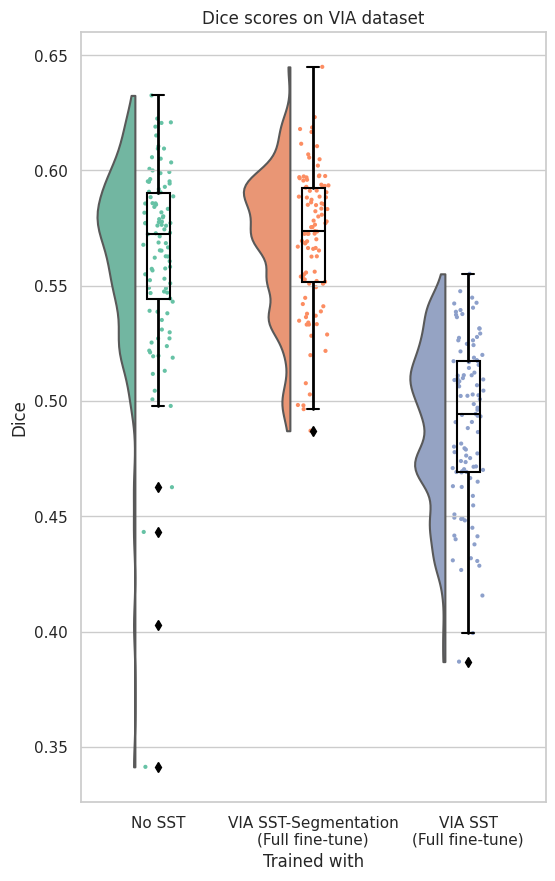

/tmp/ipykernel_2157082/3280803070.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
/tmp/ipykernel_2157082/3280803070.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_rain.rename(columns={'

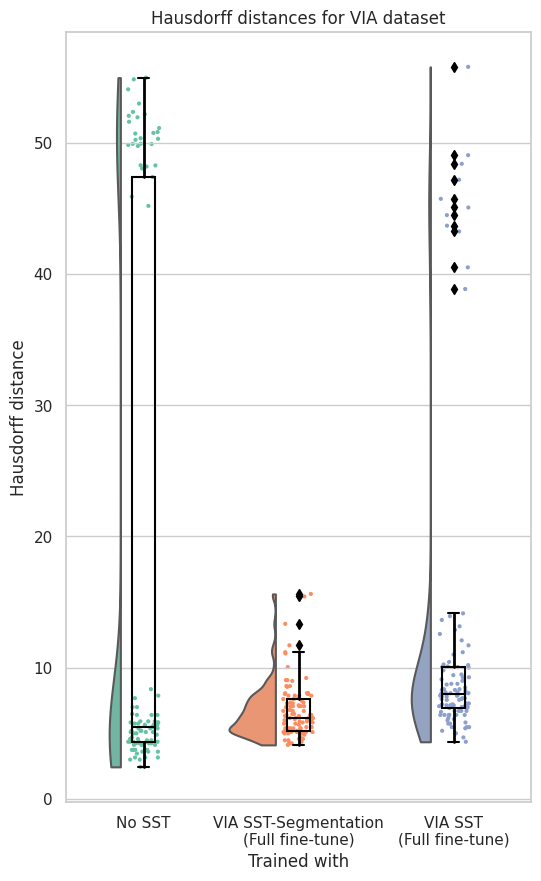

In [46]:
plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Dice"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
# plt.xticks(rotation=30)
plt.title("Dice scores on VIA dataset")
plt.show()

plot_df_rain = plot_df[plot_df.Dataset == 'via']
plot_df_rain.replace('Original Data','Original Brainvisa', inplace=True)
plot_df_rain.replace('Synthetic Data','Synthetic Brainvisa', inplace=True)
plot_df_rain.rename(columns={'Experiment':'Trained with'}, inplace=True)
pal = "Set2"
dy="Hausdorff distance"; dx="Trained with"; ort="v"

f, ax = plt.subplots(figsize=(6, 10))
ax=pt.half_violinplot( x = dx, y = dy, data = plot_df_rain, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)

x=sns.stripplot( x = dx, y = dy, data = plot_df_rain, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = plot_df_rain, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
# plt.xticks (rotation=30)
plt.title("Hausdorff distances for VIA dataset")
plt.show()

In [47]:
aggregate_results[aggregate_results.exp.isin(experiments2select)]

,exp,dataset,dice,hausdorff,table
10,CS2x_noSST_monaiUnet-fullFinetune,via,0.5622+-0.0437,17.5154+-20.4330,dice iou hausdorff_dist...
12,CS2x_via11SegmSST_monaiUnet-fullFinetune,via,0.5699+-0.0306,6.7163+-2.1130,dice iou hausdorff_dist...
14,CS2x_bvisaSST_monaiUnet-fullFinetune,via,0.4901+-0.0357,12.1818+-11.9466,dice iou hausdorff_dist...
25,CS2x_noSST_monaiUnet-fullFinetune,bvisa,0.5408+-0.0257,4.5108+-0.5651,dice iou hausdorff_distan...
26,CS2x_via11SegmSST_monaiUnet-fullFinetune,bvisa,0.5464+-0.0264,5.6262+-1.2634,dice iou hausdorff_distan...
28,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa,0.4703+-0.0252,8.8257+-1.8993,dice iou hausdorff_distan...


# Plots 5. My assurance

In [6]:
aggregate_results = []
for exp in dirs_via:
    try:
        res_csv = pd.read_csv(exp / 'via11_metrics_postproc.csv').set_index('caseid')
    except:
        print(f'No csv file found for {exp.name}')
        continue
    aggr = {'exp': exp.name,
            'dataset':'via',
            'dice':f'{res_csv.loc["MEAN", "dice"]:0.4f}+-{res_csv.loc["STD", "dice"]:0.4f}',
            'hausdorff':f'{res_csv.loc["MEAN", "hausdorff_distance"]:0.4f}+-{res_csv.loc["STD", "hausdorff_distance"]:0.4f}',
            'table':res_csv}
    aggregate_results.append(aggr)
    
aggregate_results = pd.DataFrame(aggregate_results)
merged_dfs = []
for exp in aggregate_results.index:
    df = aggregate_results.loc[exp, 'table'].iloc[:-2, :].copy()
    df.loc[:, 'Experiment'] = aggregate_results.loc[exp, 'exp']
    df.loc[:, 'Dataset'] = aggregate_results.loc[exp, 'dataset']
    merged_dfs.append(df)
merged_dfs = pd.concat(merged_dfs)
merged_dfs = merged_dfs.rename(columns={'dice':'Dice', 'hausdorff_distance':'Hausdorff distance'})

No csv file found for CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining
No csv file found for CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune
No csv file found for CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder
No csv file found for CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool
No csv file found for CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetuning-NOMaxPool
No csv file found for CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-NOMaxPool
No csv file found for CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder
No csv file found for CS2x_noSST_monaiUnet-fullFinetune
No csv file found for CS2x_bvisaSST_monaiUnet-frozenEncoder
No csv file found for CS2x_via11SegmSST_monaiUnet-fullFinetune
No csv file found for CS2x_via11SegmSST_monaiUnet-frozenEncoder
No csv file found for CS2x_bvisaSST_monaiUnet-fullFinetune


In [11]:
merged_dfs.Experiment.unique()

array(['CS1x_noSST_noSynthAugm_monaiUnet',
       'CS1x_noSST_SynthAugm_monaiUnet',
       'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
       'CS1x_via11SegmSST_monaiUnet-fullFinetune'], dtype=object)

In [15]:
plot_df

,Dice,iou,Hausdorff distance,Experiment,Dataset
caseid,,,,,
sub-via052,0.609299,0.438123,6.164414,Synthetic Augmentation No SST,via
sub-via085,0.624509,0.454026,5.385165,Synthetic Augmentation No SST,via
sub-via118,0.616143,0.445236,5.830952,Synthetic Augmentation No SST,via
sub-via126,0.624690,0.454218,6.708204,Synthetic Augmentation No SST,via
sub-via151,0.629921,0.459770,5.196152,Synthetic Augmentation No SST,via
...,...,...,...,...,...
sub-via410,0.570794,0.399378,6.557439,SST-Multi Task,via
sub-via478,0.610376,0.439238,8.124038,SST-Multi Task,via
sub-via499,0.600932,0.429523,6.708204,SST-Multi Task,via


/tmp/ipykernel_1278218/2589957993.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, texts = legend.legendHandles, legend.get_texts()


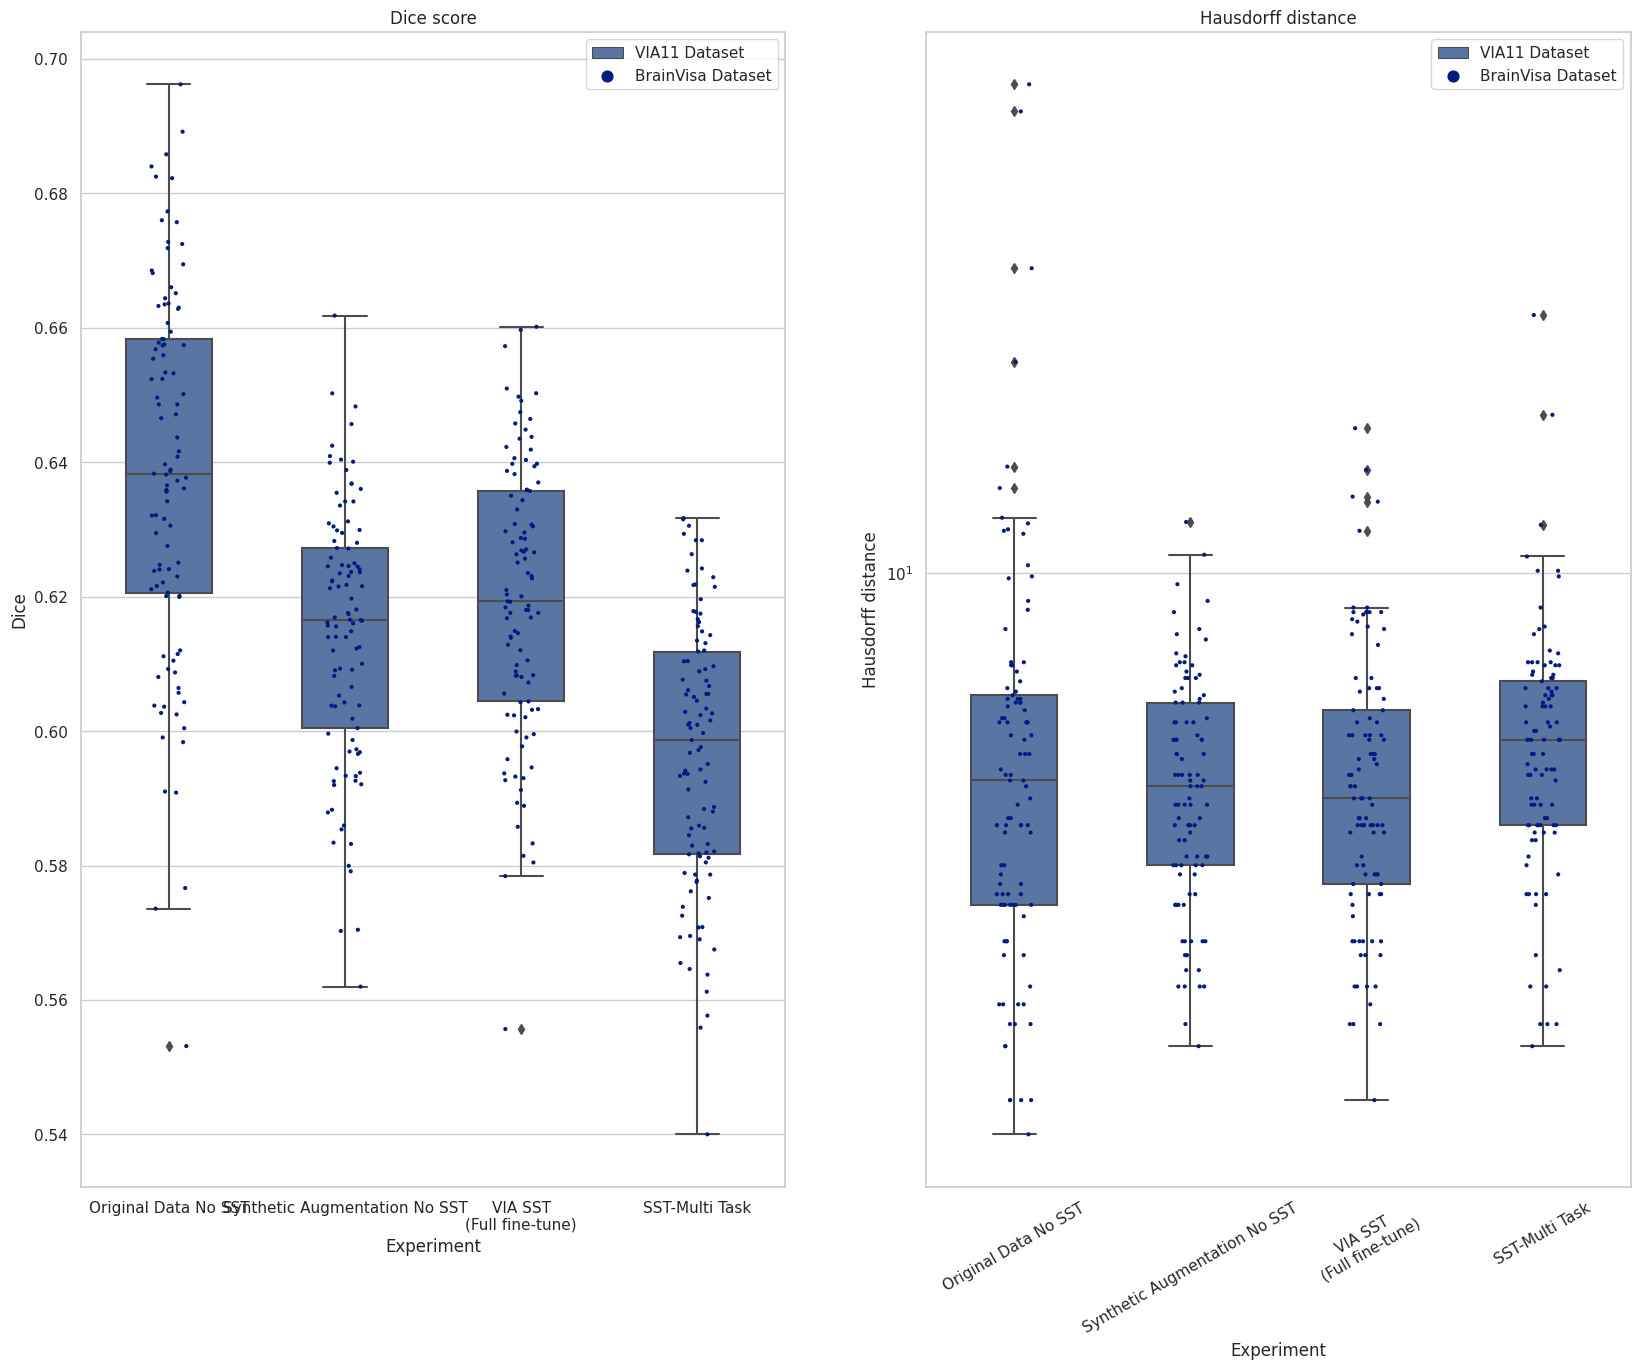

In [18]:

experiments2select = ['CS1x_noSST_noSynthAugm_monaiUnet',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
                      'CS1x_via11SegmSST_monaiUnet-fullFinetune',
                      'CS1x_noSST_SynthAugm_monaiUnet'
                      ]  
                     
experiments2rename = {'CS1x_noSST_noSynthAugm_monaiUnet':'Original Data No SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool':'VIA SST\n(Full fine-tune)',
                      'CS1x_via11SegmSST_monaiUnet-fullFinetune': 'SST-Multi Task',
                      'CS1x_noSST_SynthAugm_monaiUnet': 'Synthetic Augmentation No SST'
                       }


filter_ds = 'via' #'via'


if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig, ax = plt.subplots(1, 2, figsize=(20, 15))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5, ax=ax[0])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
              size=3, ax=ax[0],dodge=True, palette='dark'
              )


sns.boxplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
            width =0.5, ax=ax[1])
ax[0].legend(loc='lower right')
# Add in points to show each observation
sns.stripplot(data=plot_df, hue='Dataset', y='Hausdorff distance', x='Experiment',
              size=3, ax=ax[1],dodge=True, palette='dark'
              )


legend = ax[0].legend()
handles, texts = legend.legendHandles, legend.get_texts()
ax[0].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])
ax[1].legend(handles[:2], ['VIA11 Dataset', 'BrainVisa Dataset'])

plt.xticks(rotation=30)

plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=30)



ax[1].set_yscale('log')

ax[0].set_title('Dice score')
ax[1].set_title('Hausdorff distance')

plt.show()

# BVISA QC By VIA Demography

In [4]:
via_qc = pd.read_excel('/mnt/projects/VIA_Vlad/nobackup/QA_centralSulcus_lkj.xlsx')
via_demo = pd.read_excel('/mnt/projects/VIA_Vlad/nobackup/VIA11_fmriflanker_info_database_2021jan25.xlsx')
via_demo = via_demo[~via_demo.site.isna()]
via_demo['caseid'] = ['sub-via'+str(i).zfill(3) for i in via_demo['via_id']]
via_demo = via_demo.set_index('caseid')

viaid2qc = {1:[], 2:[], 3:[], 999:[]}
for i, row in via_qc.iterrows():
    viaid2qc[row['vis_QA']].append(row['subjects'])
    
via_demo = via_demo.loc[np.concatenate(list(viaid2qc.values()))]

`group`: 1 FHR-BP, 2; FHR-SZ, 3; control


`sex`: 0 female, 1 male


`handedness`: (1; left, 2; ambidextrous, 3; right)


Behavioral problem score (cbcl; column J through L) and a global functioning score (cgas; column M) as well as information on whether or not the child has a psychiatric diagnosis (axis-1) already (column N - 1; yes, 0; no). The rest of the columns are irrelevant for you.

Handedness was determined with the Edinburgh Handedness Inventory (EHI) (8) and characterized as right-handed, left-handed, or ambidextrous according to the obtained laterality quotient (LQ) score; -100 to -50, -50 to 50 and 50 to 100, respectively."

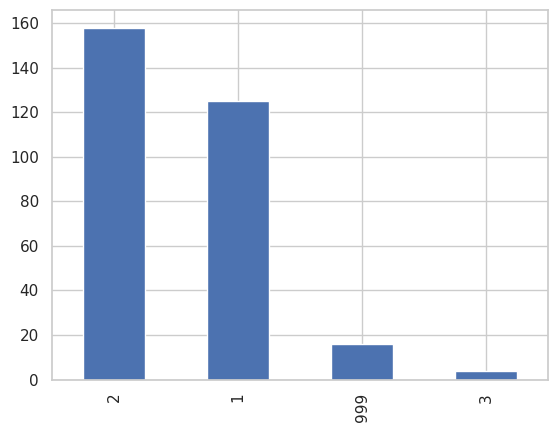

In [5]:
# plot frequency of QC scores
via_qc['vis_QA'].value_counts().plot(kind='bar')
plt.show()

In [6]:
via_demo['sex-handedness'] = [f'{x.sex}-{x.handedness}' for i, x in via_demo.iterrows()]

In [14]:
via_demo.mri_age.std()

0.27966335664306935

In [13]:
via_demo.mri_age.mean()

12.107471938158909

In [15]:
dict(via_demo['handedness'].value_counts())

{3.0: 258, 1.0: 26, 2.0: 19}

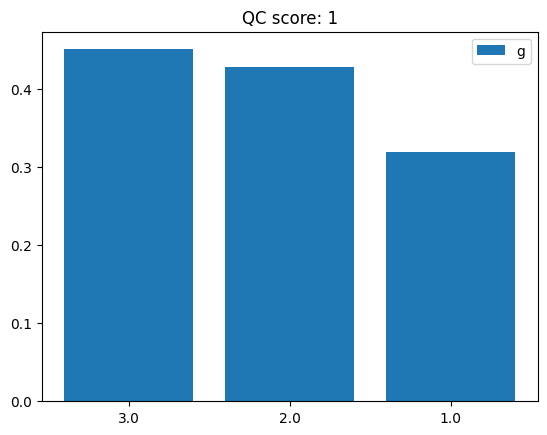

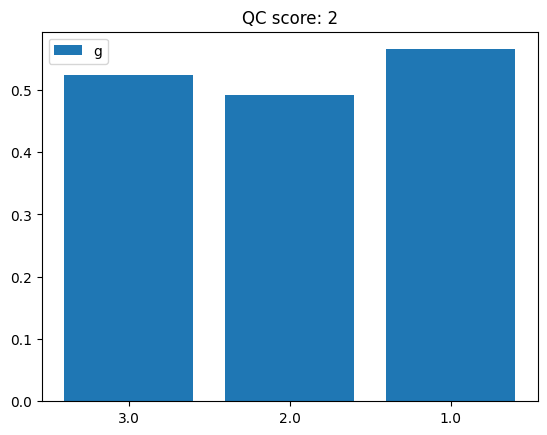

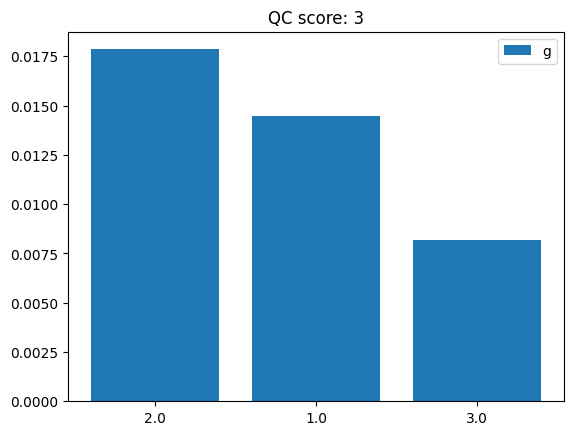

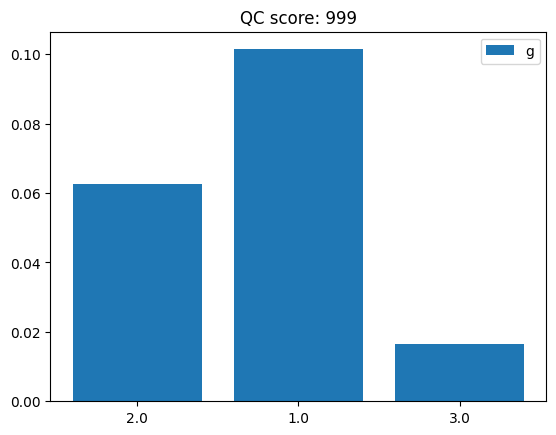

In [ ]:
feat = 'group'
total_valcounts = dict(via_demo[feat].value_counts())
qc2demo = {1:[], 2:[], 3:[], 999:[]}
for qcscore in viaid2qc:
    for caseid in viaid2qc[qcscore]:
        qc2demo[qcscore].append(via_demo.loc[caseid][feat])

for qcscore in qc2demo:
    count = Counter(qc2demo[qcscore])
    plt.bar([str(x) for x in count.keys()],
            [x[1]/total_valcounts[x[0]] for x in count.items()])
    plt.title('QC score: '+str(qcscore))
    plt.legend(f'{feat} frequency')
    plt.show()

<BarContainer object of 2 artists>

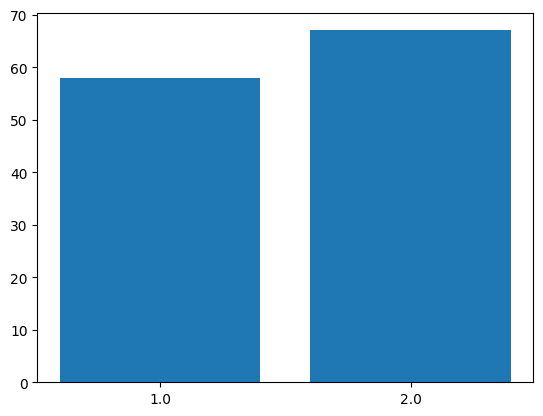

In [ ]:
count = Counter(qc2demo[1])
plt.bar([str(x) for x in count.keys()], count.values())

<BarContainer object of 125 artists>

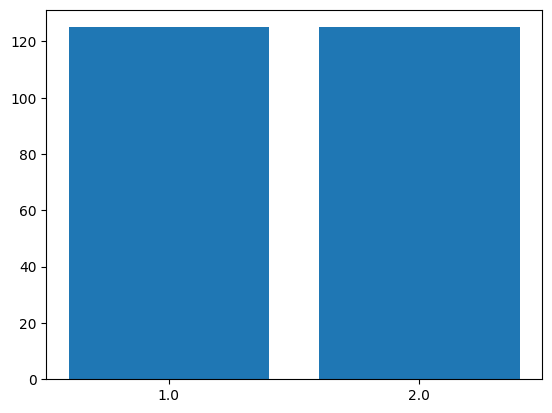

In [ ]:
plt.bar([str(x) for x in qc2demo[1]], [len(qc2demo[1])])

In [ ]:
via_demo

,via_id,in_via11,stormdb,site,group,mri_age,sex,handedness,tanner,cbcl_total,...,flanker_behav_com_error_30p,flanker_behav_incon_3sd,flanker_behav_deltaRT_3sd,no_sMRI,no_flanker_fMRI,Braces,neurological disorder,in_flanker_behav,in_flanker_analysis,comment
caseid,,,,,,,,,,,,,,,,,,,,,
sub-001,1,NaN,16.0,2.0,2.0,11.531828,0.0,3.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,wrong e-prime
sub-003,3,NaN,NaN,1.0,3.0,12.188912,0.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,NaN
sub-004,4,NaN,NaN,1.0,3.0,11.764545,0.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,wrong e-prime
sub-005,5,NaN,NaN,1.0,3.0,11.493498,0.0,3.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,wrong e-prime
sub-006,6,NaN,NaN,1.0,3.0,11.808350,0.0,NaN,2.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-517,517,NaN,227.0,2.0,3.0,11.641342,1.0,3.0,3.0,4.0,...,0.0,0.0,0.0,1.0,1.0,0,0,0.0,0.0,stim. Com. Malfunction
sub-518,518,NaN,NaN,1.0,3.0,12.353183,1.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,NaN
sub-519,519,NaN,239.0,2.0,3.0,12.533881,1.0,3.0,4.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,NaN


<Axes: ylabel='Frequency'>

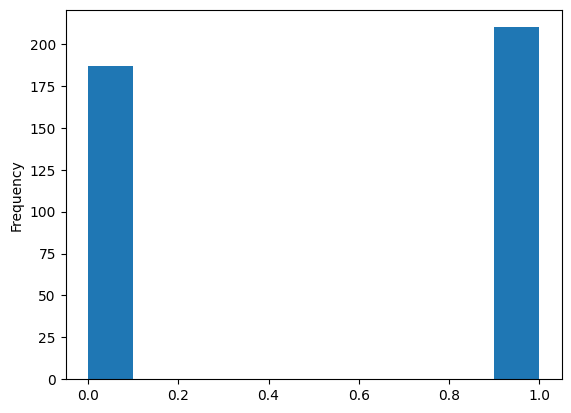

In [ ]:
via_demo.sex.plot(kind='hist')

# Results by QC class

In [ ]:
exp_name = 'CS2x_via11SegmSST_monaiUnet-fullFinetune'
merged_dfs[(merged_dfs.Experiment == exp_name) & (merged_dfs.Dataset == 'via')]

,Dice,iou,Hausdorff distance,Experiment,Dataset
caseid,,,,,
sub-via052,0.610526,0.439394,4.472136,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
sub-via085,0.597510,0.426035,11.704700,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
sub-via118,0.588652,0.417085,5.196152,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
sub-via126,0.588353,0.416785,4.242641,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
sub-via151,0.580027,0.408478,8.000000,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
...,...,...,...,...,...
sub-via410,0.597577,0.426104,5.196152,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
sub-via478,0.528302,0.358974,7.071068,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
sub-via499,0.587302,0.415730,10.049876,CS2x_via11SegmSST_monaiUnet-fullFinetune,via
